Acceptance Testing
==================

The final level of the tests granularity is Acceptance Testing. Acceptance Testing has the purpose of evaluating the application and determine whether the software system has met the requirements specifications. It means that the test determines if the system is ready for release or not.

During this phase of testing, the user will test the system to find out whether the application meets their business needs. The results can give the customer the security that the application has the required features and behaves as expected. Resuming, acceptance tests represent the customer’s interests.

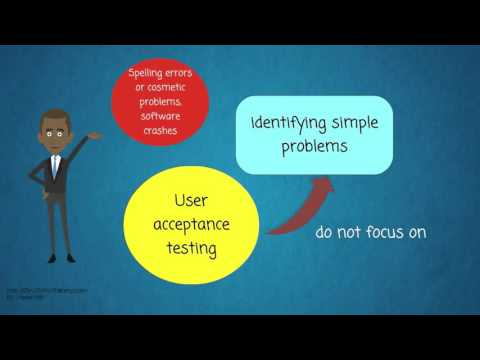

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('ws7KS39jMBU')

## Hands On
<a 
href="https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testgranularity/acceptancetesting/AcceptanceTesting.ipynb" target="_blank"> 
<img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"></a>

Behavior-driven development (or BDD) is an agile software development technique that encourages collaboration between developers, QA and non-technical or business participants in a software project. The BDD advantage is that the test cases can be written in a common language, such as English, so details of how the application behaves can be understood by all members of the team.

[behave](https://behave.readthedocs.io/en/latest/index.html) uses tests written in a natural language style, backed up by Python code.

### Installation using pip

Execute the following command to install behave with pip:

In [ ]:
!pip install behave

To update an already installed behave version, use:

In [ ]:
!pip install -U behave


See also pip related information for installing Python packages.

to see other forms of installation visit: [https://behave.readthedocs.io/en/latest/install.html](https://behave.readthedocs.io/en/latest/install.html)

You must install [PyHamcrest](https://pypi.org/project/PyHamcrest/), it will provide functions to validate our test result, such as assert and equal.


In [ ]:
!pip install PyHamcrest


### Create Your Scenarios
Now make a directory called “features”. In that directory create a file called “tutorial.feature” containing:

```python
# file:features/tutorial.feature
Feature: My Juice

  Scenario: Blenders
    Given I put "apples" in a blender
    When  I switch the blender on
    Then  it should transform into "apple juice"
```

> Hint: Put parameters in **double-quoted text** to make variation-points visible. The test runner output does not have this problem, because it often marks these parameters as **bold text**.

### Create Your Steps
Make a new directory called “features/steps”. This directory will provide your test automatation. In that directory create a file called “tutorial.py” containing:

```sh
# file:features/steps/tutorial.py
# ----------------------------------------------------------------------------
# STEPS:
# ----------------------------------------------------------------------------
from behave   import given, when, then
from hamcrest import assert_that, equal_to
from blender  import Blender

@given('I put "{thing}" in a blender')
def step_given_put_thing_into_blender(context, thing):
    context.blender = Blender()
    context.blender.add(thing)

@when('I switch the blender on')
def step_when_switch_blender_on(context):
    context.blender.switch_on()

@then('it should transform into "{other_thing}"')
def step_then_should_transform_into(context, other_thing):
    assert_that(context.blender.result, equal_to(other_thing))
```

In this example, the feature "My juice" will be tested by each step described in the scenario. The step *Given* is waiting for one parameter and is going to be responsible for instantiating the python class. The step *When* is responsible for calling the main method of the feature juice. Finally, the step *Then* is going to validate if the parameter passed in the beginning is the expected one.

### Provide the Domain Model

In this example, the python class is going to be **Blender**. This class will represent a blender which functionality is to make fruit juice.

```python
# file:features/steps/blender.py
# -----------------------------------------------------------------------------
# DOMAIN-MODEL:
# -----------------------------------------------------------------------------
class Blender(object):
    TRANSFORMATION_MAP = {
        "apples": "apple juice",
        "grapes": "grapes juice",
        "lemons": "lemons juice",
        "oranges": "oranges juice",
        "strawberries": "strawberries juice",
    }
    def __init__(self):
        self.thing  = None
        self.result = None

    @classmethod
    def select_result_for(cls, thing):
        return cls.TRANSFORMATION_MAP.get(thing, "EMPTY")

    def add(self, thing):
        self.thing = thing

    def switch_on(self):
        self.result = self.select_result_for(self.thing)
```

### Run the Feature
You have to run this command to test your feature:

In [ ]:
!behave features/tutorial.feature

Now, continue reading to learn how to make the most of behave.Now, continue reading to learn how to make the most of behave: [https://behave.readthedocs.io/en/latest/tutorial.html#features](https://behave.readthedocs.io/en/latest/tutorial.html#features)

See the complete documentation: [https://behave.readthedocs.io/en/latest/index.html](https://behave.readthedocs.io/en/latest/index.html)

## Final Consideration

There are different types of acceptance tests, like Alpha & Beta Testing, Contract Acceptance Testing, Regulation Acceptance Testing, and Operational Acceptance Testing. All of these tests are done before the software is released to all customers. The difference between them is the specifications that the test must validate, for example, regulation acceptance tests are to certificate the software is filling specific rules and regulations.

There is a difference between acceptance tests and functional testing. The acceptance tests verify if the specific requirements are working for the user, it means, the costumer and the stakeholders have to agree on the product. On the other hand, the functional testing validates the specific requirements and specifications of the software, but does not mean that it actually work for the user.

## References
- [behave](https://behave.readthedocs.io/en/latest/)
- [behave example](https://jenisys.github.io/behave.example/tutorials/tutorial03.html)
- [Kuldeep Rana, Acceptance Testing](https://artoftesting.com/acceptance-testing)
- [Thomas Peham, "5 Types of User Accpetance Testing"](https://usersnap.com/blog/types-user-acceptance-tests-frameworks/?utm_source=slideshare&utm_medium=referral&utm_campaign=slideshare_presentation)
- [Tahmina Naznin, "User Acceptance Testing [UAT]"](https://medium.com/oceanize-geeks/user-acceptance-testing-uat-19e660c96bd6)
- [ W3Softech, "What is Acceptance Testing? Types and Examples"](https://w3softech.com/blog/acceptance-testing-types-and-examples/)
- [Anamika Kalwan, "What is Acceptance Testing in Software Testing?"](https://www.edureka.co/blog/acceptance-testing/)
